In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("D:\\sql tut\\Online Retail.xlsx")

In [7]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
print

In [10]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [14]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [24]:
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


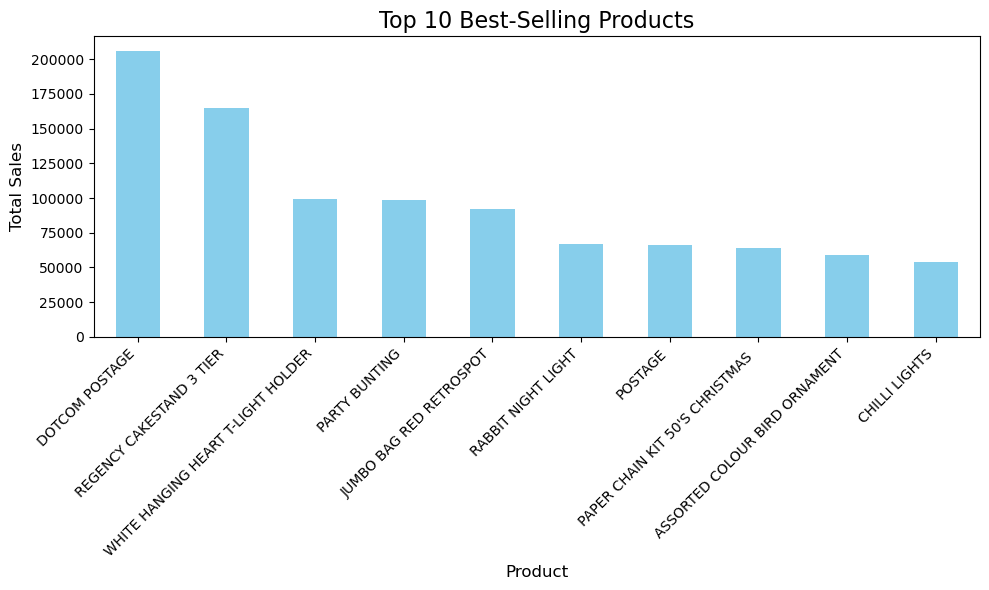

In [26]:
Product_sales = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
Product_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

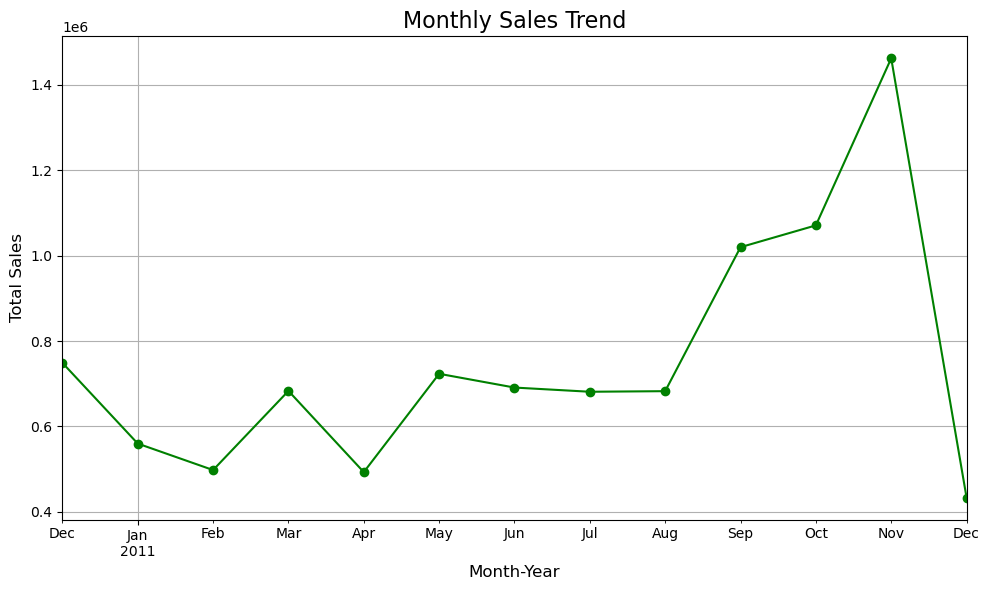

In [28]:
# Convert InvoiceDate to datetime and extract month-year
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

# Group by MonthYear and calculate total sales
monthly_sales = df.groupby('MonthYear')['TotalSales'].sum()

# Plot a line chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

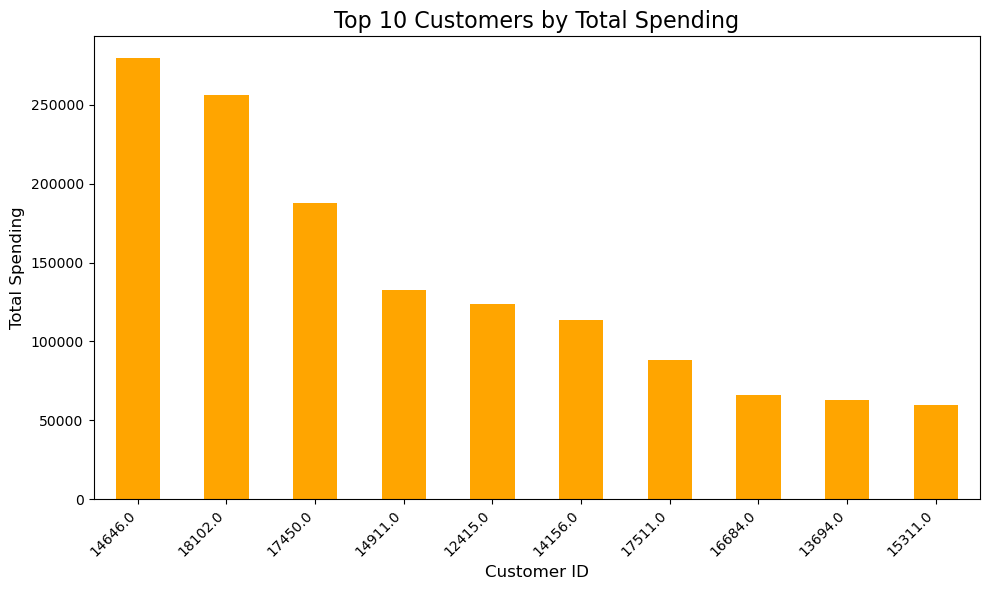

In [30]:
# Group by CustomerID and calculate total spending
customer_sales = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
customer_sales.plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Total Spending', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


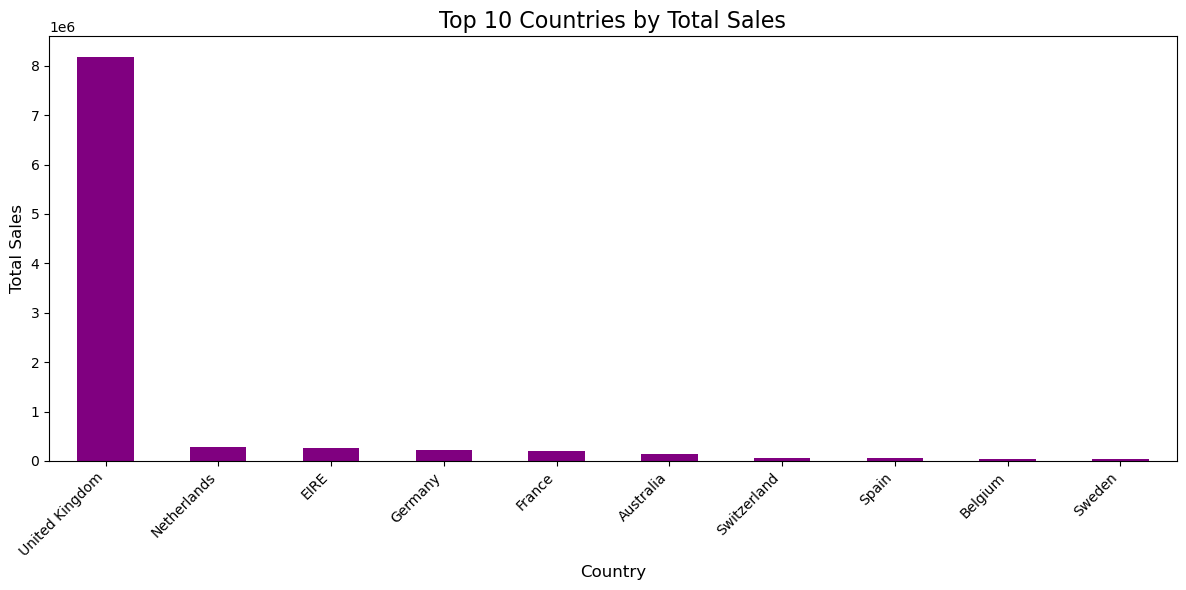

In [32]:
# Group by Country and calculate total sales
Country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Plot a bar chart for the top 10 countries
plt.figure(figsize=(12, 6))
Country_sales.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Total Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

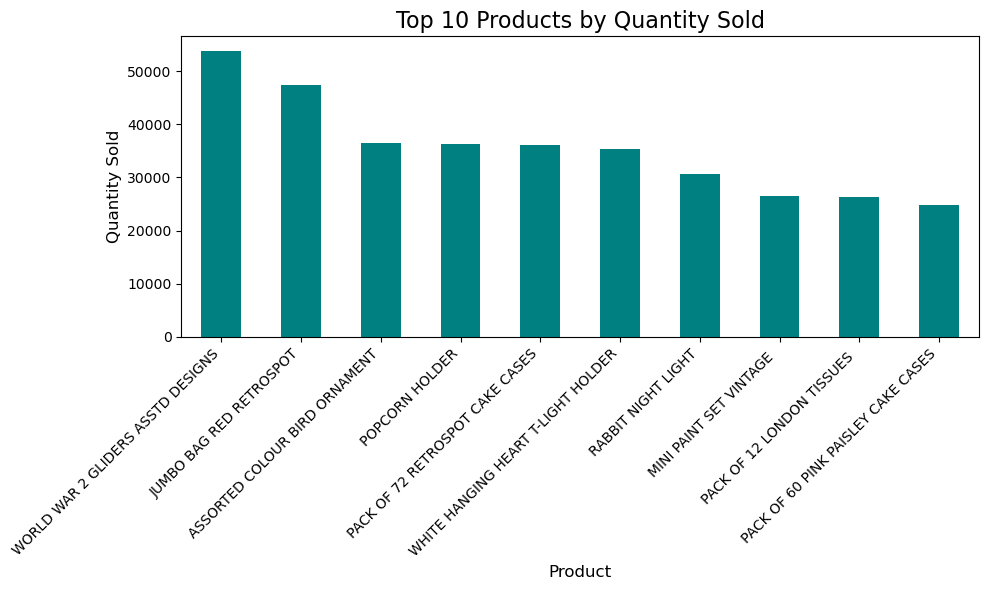

In [34]:
# Group by Description and sum up quantities sold
Top_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
Top_products_quantity.plot(kind='bar', color='teal')
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

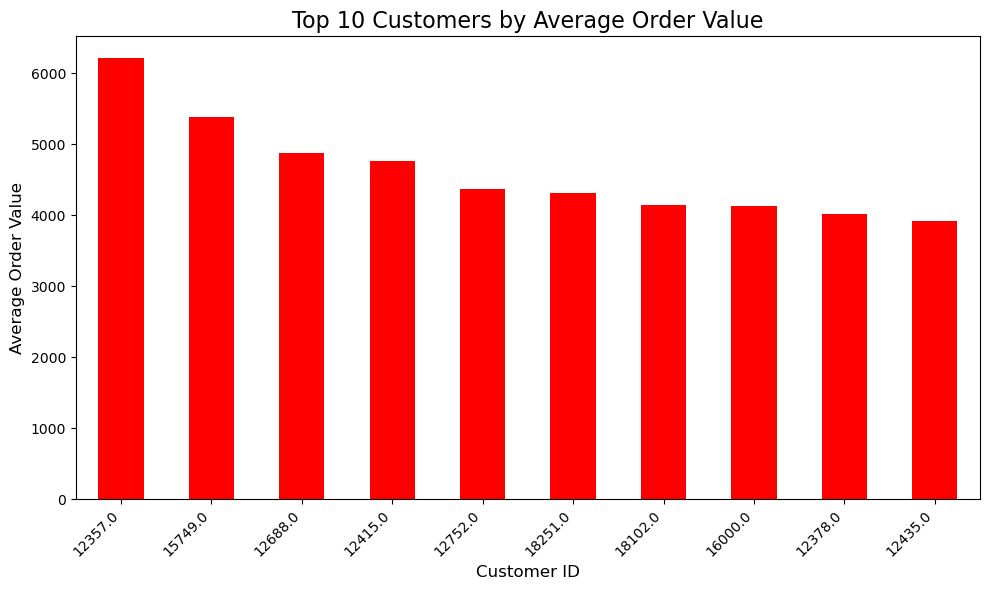

In [36]:
aov = df.groupby('CustomerID').agg({'TotalSales': 'sum', 'InvoiceNo': 'nunique'})
aov['AverageOrderValue'] = aov['TotalSales'] / aov['InvoiceNo']

# Plot the top 10 AOVs
Top_aov = aov['AverageOrderValue'].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
Top_aov.plot(kind='bar', color='red')
plt.title('Top 10 Customers by Average Order Value', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [38]:
# Count unique customers and total invoices
unique_customers = df['CustomerID'].nunique()
total_invoices = df['InvoiceNo'].nunique()

# Percentage of repeat customers
repeat_customer_rate = (total_invoices - unique_customers) / total_invoices * 100

print(f"Repeat Customer Rate: {repeat_customer_rate:.2f}%")


Repeat Customer Rate: 83.12%


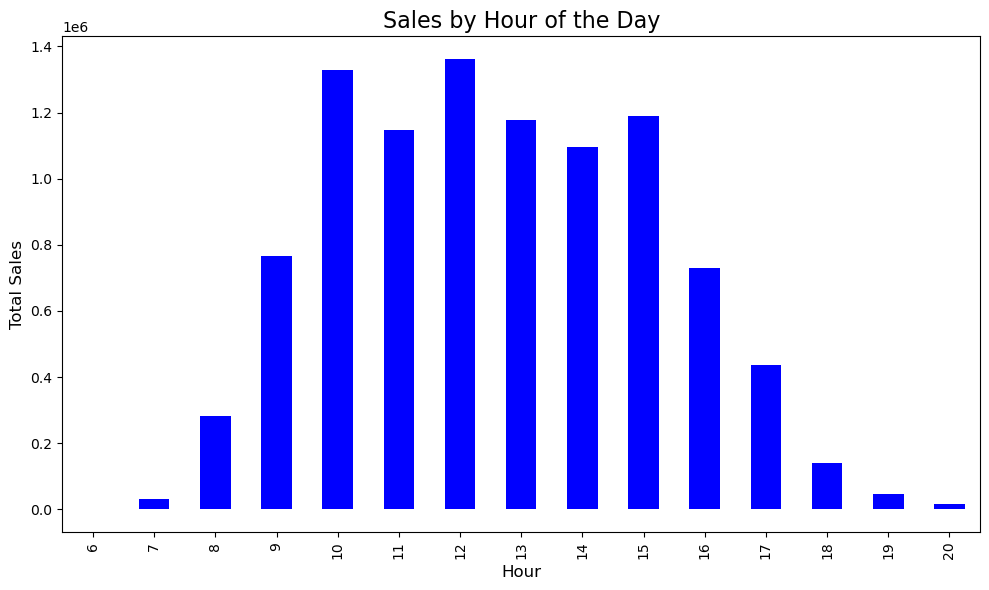

In [40]:
# Extract hour from InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour

# Group by hour and calculate total sales
hourly_sales = df.groupby('Hour')['TotalSales'].sum()

# Plot a bar chart
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar', color='blue')
plt.title('Sales by Hour of the Day', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()
